# Determing the Morphology of the Merger remnant of the Milky Way + M31

This code uses multiple parts/approches to determining the morphology to the remnant of a dry major merger, looking at the example of our own Milky Way and M31. We are able to do so in detail, do to the knowledge of the initial conditions of the two galaxies. In the project code, we will be addressing 2 questions:

    1. What is the morphology of the merger?
    2. What is the distribution of stellar particles from each galaxy in the merger?
    
In order to answer the first question, I will be taking both a qualitative and analytical approach. First, there will be a determination based on what what the orientation of the stellar particles are in 3 dimensions. Second, I will then use a analytic method to back up observation by comparing the stellar surface density profile to the Sersic profile for an elliptical and spiral galaxy.

For the second question, I will take a look at the shape of the individual galaxies in the merger, to see if the mixing of the particles become homogeneous or if one disk is dominant over the other. This will be done both visually and by plotting the contours of the individual galaxy particles in the merger

In [40]:
#importing all the modules needed for code
import numpy as np
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as c
# import previous HW functions
from ReadFile import Read
#rixin's read file for the density code
from RL_ReadFile import RL_Read
# matplotlib provides powerful functions for plotting figures
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
import matplotlib.pyplot as plt
# Plotly's Python graphing library makes interactive, publication-quality graphs
#import plotly.graph_objects as plygo
# nbagg is the matplotlib backend for interactive plotting in notebooks
%matplotlib inline
from matplotlib.colors import LogNorm

## Part 1. Plotting the Position of the Stellar Particles

In this first part, I'll be utilizing a center of mass equation in order to the position of a stellar particle relative to the center of mass (COM) of that individual galaxy. I will be plotting the 3 different planes- xy, xz, and zy- in order to make sure that I am making an accurate analysis of morphology in 3D. I will also be showing the positions in 3 different snapshots, the beginning, in the middle of an encounter, and at the end, 11 Gyr into the future. This will show how the morphology compare in differnt stages of the merger. 

Note: for the snapshot 0 (current time) plot, I will just be focusing on the Milky Way to clearly show the disk morphology (too zoomed out to try and show both)

In [2]:
#COM Data for MW Disk- snapshot 0
COM_MW_Start = CenterOfMass("MW_VLowRes/MW_000.txt",2)
#COM Data for M31 Disk
COM_M31_Start = CenterOfMass("M31_VLowRes/M31_000.txt",2)

#COM position by Galaxy
#MW
COMP_MW_Start = COM_MW_Start.COM_P(0.1,2.0)
#M31
COMP_M31_Start = COM_M31_Start.COM_P(0.1,2.0)

#just the position based on the coordinates from CenterofMass outplut
MWxs = COM_MW_Start.x-COMP_MW_Start[0].value
MWys = COM_MW_Start.y-COMP_MW_Start[1].value
MWzs = COM_MW_Start.z-COMP_MW_Start[2].value
#M31xs = COM_M31_Start.x#-COMP_M31_Start[0].value
#M31ys = COM_M31_Start.y#-COMP_M31_Start[1].value
#M31zs = COM_M31_Start.z#-COMP_M31_Start[2].value


#mid-point, during merger, snap 445#

#COM Data for MW Disk
COM_MW_Mid = CenterOfMass("MW_VLowRes/MW_445.txt",2)
#COM Data for M31 Disk
COM_M31_Mid = CenterOfMass("M31_VLowRes/M31_445.txt",2)

#COM position by Galaxy
#MW
COMP_MW_Mid = COM_MW_Mid.COM_P(0.1,2.0)
#M31
COMP_M31_Mid = COM_M31_Mid.COM_P(0.1,2.0)

#just the position based on the coordinates from CenterofMass outplut
MWxm = COM_MW_Mid.x-COMP_MW_Mid[0].value
MWym = COM_MW_Mid.y-COMP_MW_Mid[1].value
MWzm = COM_MW_Mid.z-COMP_MW_Mid[2].value
M31xm = COM_M31_Mid.x-COMP_M31_Mid[0].value
M31ym = COM_M31_Mid.y-COMP_M31_Mid[1].value
M31zm = COM_M31_Mid.z-COMP_M31_Mid[2].value

#COM Data for MW Disk
COM_MW = CenterOfMass("MW_VLowRes/MW_800.txt",2)
#COM Data for M31 Disk
COM_M31 = CenterOfMass("M31_VLowRes/M31_800.txt",2)

#COM position by Galaxy
#MW
COMP_MW = COM_MW.COM_P(0.1,2.0)
#M31
COMP_M31 = COM_M31.COM_P(0.1,2.0)

#just the position based on the coordinates from CenterofMass outplut
MWx = COM_MW.x-COMP_MW[0].value
MWy = COM_MW.y-COMP_MW[1].value
MWz = COM_MW.z-COMP_MW[2].value
M31x = COM_M31.x-COMP_M31[0].value
M31y = COM_M31.y-COMP_M31[1].value
M31z = COM_M31.z-COMP_M31[2].value

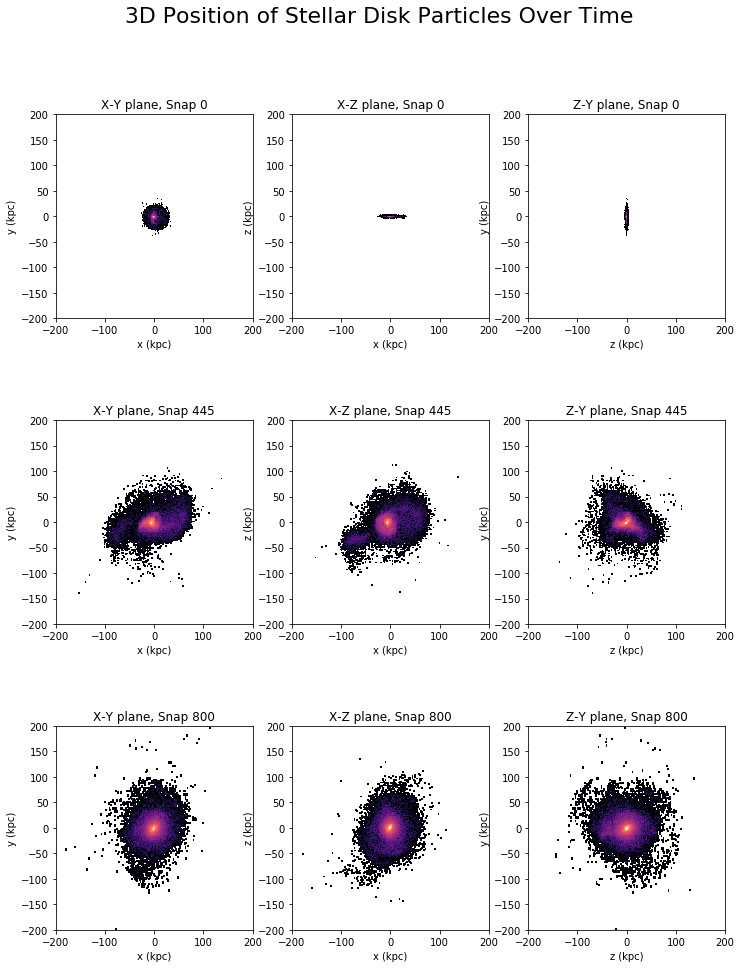

In [49]:
### testing a 3x3 plot at beginning, middle (during the second encounter) and at the end - which I have above

fig, ax = plt.subplots(figsize =(12 ,15),nrows=3, ncols=3, gridspec_kw={'hspace':0.5,'wspace': 0.2})

fig.suptitle("3D Position of Stellar Disk Particles Over Time",fontsize=22)

###Snapshot 000###
#ax[0,0] -> top left side of plot, shows x and y position of merger
ax[0,0].hist2d(MWxs,MWys, bins=150, norm=LogNorm(),cmap='magma')
#ax[0,0].hist2d(M31xs,M31ys, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[0,0].set_xlabel('x (kpc)')#, fontsize=22)
ax[0,0].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[0,0].set_ylim(-200,200)
ax[0,0].set_xlim(-200,200)
#title for this plot
ax[0,0].set_title("X-Y plane, Snap 0", fontsize=12)

#ax[2,1] -> top right side of the plot, shows x and z position of merger
ax[0,1].hist2d(MWxs,MWzs, bins=150, norm=LogNorm(),cmap='magma')
#ax[0,1].hist2d(M31xs,M31zs, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[0,1].set_xlabel('x (kpc)')#, fontsize=22)
ax[0,1].set_ylabel('z (kpc)')#, fontsize=22)
#set axis limits
ax[0,1].set_ylim(-200,200)
ax[0,1].set_xlim(-200,200)
#title for this plot
ax[0,1].set_title("X-Z plane, Snap 0",fontsize=12)

#ax[1,0] - > bottom left side of plot, shows y and z position of merger
ax[0,2].hist2d(MWzs,MWys, bins=150, norm=LogNorm(),cmap='magma')
#ax[0,2].hist2d(M31zs,M31ys, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[0,2].set_xlabel('z (kpc)')#, fontsize=22)
ax[0,2].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[0,2].set_ylim(-200,200)
ax[0,2].set_xlim(-200,200)
#title for this plot
ax[0,2].set_title("Z-Y plane, Snap 0",fontsize=12)


###SnapShot 445###
#ax[0,0] -> top left side of plot, shows x and y position of merger
ax[1,0].hist2d(MWxm,MWym, bins=150, norm=LogNorm(),cmap='magma')
ax[1,0].hist2d(M31xm,M31ym, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[1,0].set_xlabel('x (kpc)')#, fontsize=22)
ax[1,0].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[1,0].set_ylim(-200,200)
ax[1,0].set_xlim(-200,200)
#title for this plot
ax[1,0].set_title("X-Y plane, Snap 445",fontsize=12)

#ax[2,1] -> top right side of the plot, shows x and z position of merger
ax[1,1].hist2d(MWxm,MWzm, bins=150, norm=LogNorm(),cmap='magma')
ax[1,1].hist2d(M31xm,M31zm, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[1,1].set_xlabel('x (kpc)')#, fontsize=22)
ax[1,1].set_ylabel('z (kpc)')#, fontsize=22)
#set axis limits
ax[1,1].set_ylim(-200,200)
ax[1,1].set_xlim(-200,200)
#title for this plot
ax[1,1].set_title("X-Z plane, Snap 445",fontsize=12)

#ax[1,0] - > bottom left side of plot, shows y and z position of merger
ax[1,2].hist2d(MWzm,MWym, bins=150, norm=LogNorm(),cmap='magma')
ax[1,2].hist2d(M31zm,M31ym, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[1,2].set_xlabel('z (kpc)')#, fontsize=22)
ax[1,2].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[1,2].set_ylim(-200,200)
ax[1,2].set_xlim(-200,200)
#title for this plot
ax[1,2].set_title("Z-Y plane, Snap 445",fontsize=12)

###Snapshot 800###
#ax[0,0] -> top left side of plot, shows x and y position of merger
ax[2,0].hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
ax[2,0].hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[2,0].set_xlabel('x (kpc)')#, fontsize=22)
ax[2,0].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[2,0].set_ylim(-200,200)
ax[2,0].set_xlim(-200,200)
#title for this plot
ax[2,0].set_title("X-Y plane, Snap 800",fontsize=12)

#ax[2,1] -> top right side of the plot, shows x and z position of merger
ax[2,1].hist2d(MWx,MWz, bins=150, norm=LogNorm(),cmap='magma')
ax[2,1].hist2d(M31x,M31z, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[2,1].set_xlabel('x (kpc)')#, fontsize=22)
ax[2,1].set_ylabel('z (kpc)')#, fontsize=22)
#set axis limits
ax[2,1].set_ylim(-200,200)
ax[2,1].set_xlim(-200,200)
#title for this plot
ax[2,1].set_title("X-Z plane, Snap 800",fontsize=12)

#ax[1,0] - > bottom left side of plot, shows y and z position of merger
ax[2,2].hist2d(MWz,MWy, bins=150, norm=LogNorm(),cmap='magma')
ax[2,2].hist2d(M31z,M31y, bins=150, norm=LogNorm(),cmap='magma' )
#ax[0,0].colorbar()
# Add axis labels
ax[2,2].set_xlabel('z (kpc)')#, fontsize=22)
ax[2,2].set_ylabel('y (kpc)')#, fontsize=22)
#set axis limits
ax[2,2].set_ylim(-200,200)
ax[2,2].set_xlim(-200,200)
#title for this plot
ax[2,2].set_title("Z-Y plane, Snap 800",fontsize=12)

fig.savefig("StellarParticlePositionFinal.jpg")


## Part 2: Density and Sersic Profile of the Merger

For the second part, I will be taking an analytical look at the morphology of the Milky Way and M31 galaxies, before, during, and after the merger. I will be comparing the density profile shape to the profile of an elliptical and a spiral galaxy. From this comparision, I should be able to see if the merger is more similar to an elliptical or lenticular galaxy.

### Part 2.1 The Density Profile

To calculate the surface density of the disk, I will be utilizing the center of mass from before, and will calculate the the density in rings. First, I'll need to calculate the radius and the azimuthal angles.

    R = sqrt(x^2+y^2+z^2)

    Theta = arctan(R)

In this code, the surface density will be calculated via mass annuli, which will be calculated by the difference of mass enclosed. The surface density itself is then calculated by dividing the area of the disk mass annulus. 

    Sigma = M_{ann}/pi*R

This code was adapted from Rixin's stellar morphology playground provided on Slack

In [4]:
### Functions needed for the Density Profile - Rixin's Code ###

#adapted center of mass
class CenterOfMass_RL:
    """ Hold the COM position & velocity of a galaxy at a given snapshot """
    
    def __init__(self, filename, ptype):
        """ Initialize this class with relevant data """
        
        # read in the file
        self.time, self.total, self.data = RL_Read(filename)
        
        # extract particles with the desired type
        self.par_data = self.data[self.data['type'] == ptype]
        
        # extract the mass, positions, and velocities of particles of interest
        self.m = self.par_data['m']
        self.r = self.par_data['r']
        self.v = self.par_data['v']
        
    def COMdefine_RL(self, q, m):
        """ Return the mass-weighted mean position(q) in a given phase space """
        
        # because q has the shape of (total, 3) and m has the shape of (total,)
        # we need to give m a virtual axis to broadcast array operations;
        # then we sum along axis 0 (i.e., sum up all particles)
        # this function will then return a 3-element array
        return np.sum(q * m[:, np.newaxis], axis=0) / np.sum(m)
        
    def COM_P_RL(self, delta, VolDec):
        """ Iteratively determine the COM position """
        
        # get the first COM guess by calling COMdefine on all particles
        COM_r = self.COMdefine_RL(self.r, self.m)
        # calculate the magnitude of the COM position vector
        COM_r_mag = np.sqrt(np.sum(COM_r**2))
        
        # calculate the coordinates of particles in the new COM reference frame
        par_r = self.r - COM_r
        par_r_mag = np.sqrt(np.sum(par_r**2, axis=1))
        par_m = self.m
        
        # use a reduced distance of the farthest particle for new calculations
        par_r_max = max(par_r_mag) / VolDec
        # create a guess list of the COM position vectors
        COM_r_list = []; COM_r_list.append(COM_r)
        # choose an initial estiamte for the change in COM position
        change = 1000.0
        
        # now iterative the following process to determine the COM
        while change > delta:
            
            # extract the particles within the reduced volume
            par_r = par_r[par_r_mag < par_r_max]
            par_m = par_m[par_r_mag < par_r_max]
            
            # get the new COM guess based on remaining particles and append it
            COM_r = self.COMdefine_RL(par_r, par_m)
            COM_r_mag = np.sqrt(np.sum(COM_r**2))
            COM_r_list.append(COM_r)
            
            # COM_r_mag is exactly the change in COM position
            # between the previous guess and this guess
            change = COM_r_mag
            #print(COM_r, change) # if interested, print them out
            
            # prepare for the next round of calculations
            par_r_max /= VolDec # shrink the volume radius again
            par_r = par_r - COM_r # shift particles to the new reference frame
            par_r_mag = np.sqrt(np.sum(par_r**2, axis=1)) # get new magnitudes
        
        # Note: each COM guess is in the reference frame of the previous guess
        COM_r_list = np.asarray(COM_r_list) # convert array list to a 2d array
        # convert each guess back to the original coordinate system
        COM_r_list = np.cumsum(COM_r_list, axis=0)
        
        # return the final guess of COM position vector (round it and add units)
        return np.round(COM_r_list[-1], 2) * u.kpc
    
    def COM_V_RL(self, COM_r):
        """ Return the COM velocity based on the COM position """
        
        # the max distance from the COM_r 
        # that we will use to determine the COM velocity
        RV_MAX = 15.0 * u.kpc
        
        # calculate the coordinates of particles in the new COM reference frame
        # since COM_r has units, further calculations need to be dimensional
        par_r = self.r * u.kpc - COM_r
        par_r_mag = np.sqrt(np.sum(par_r**2, axis=1))
        
        # extract the particle properties within the max distance
        par_v = self.v[par_r_mag < RV_MAX]
        par_m = self.m[par_r_mag < RV_MAX]
        
        # calculate the COM velocity
        COM_v = self.COMdefine_RL(par_v, par_m)
        
        # return the COM velocity (round it and add units)
        return np.round(COM_v, 2) * u.km/u.s
    
#rotating frame
def RotateFrame(posI, velI):
    # input:  3D array of positions and velocities
    # returns: 3D array of rotated positions and velocities such that j is in z direction

    # compute the angular momentum
    L = np.sum(np.cross(posI, velI), axis=0)
    # normalize the vector
    L_norm = L / np.sqrt(np.sum(L**2))

    # Set up rotation matrix to map L_norm to z unit vector (disk in xy-plane)
   
    # z unit vector and Identity matrix
    z_norm = np.array([0, 0, 1])
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # two special cases need attentions
    if c == 1: # when L_norm points the same direction as z_norm
        R = I
    elif c == -1: # when L_norm and z_norm point into exactly opposite directions
        # a rotation of pi about any axis perpendicular to z_norm works
        R = np.array([[1, 0, 0], [0, -1, 0], [0, 0, -1]]) # here it is about x-axis
    else:    
        # rotation matrix
        v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
        R = I + v_x + np.dot(v_x, v_x) * (1 - c) / s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel

In [5]:
### Density Profile - This will use the RL version of Center of Mass ###

class SurfaceDensityProfile:
    """ calculate the surface density profile of a galaxy at a snapshot """
    
    def __init__(self, data_dir, galaxy, snap_id, radii=None):
        """ initialization
        input:
            galaxy: the name of the galaxy of interest
            snap_id: the number of the snapshot of interest
            radii: an array of radii from a near-center point to the outer skirt
                   default value: np.arange(0.1, 0.95*r_outermost, 1.0)
                   feel free to choose a finer step length for high resolution data
        """
    
        # compose the data filename to read
        self.filename = data_dir + galaxy + "_{:03d}".format(snap_id) + ".txt"
        
        # set tolerance and VolDec for calculating COM_P in CenterOfMass
        delta, VolDec = 0.1, 2.0
        if galaxy is "M33": # for M33 that is stripped more, use different values
            delta, VolDec = 0.1, 4.0
        
        # calculate the COM position and velocity
        # N.B.: self.com contains lots of info, see its member variables in the definition above
        self.com = CenterOfMass_RL(self.filename, 2)
        com_r = self.com.COM_P_RL(delta, VolDec)
        com_v = self.com.COM_V_RL(com_r)
        self.com_r, self.com_v = com_r.value, com_v.value # remove the units for convenience

        # rotate the frame to align the disk with angular momentum
        # note that self.com.r is the position vectors of all disk particles in the original frame
        #       and self.com.v is the velocity vectors of all disk particles in the original frame
        self.alg_r, self.alg_v = RotateFrame(self.com.r - self.com_r, self.com.v - self.com_v)

        # calculate the radial distances and azimuthal angles in the cylindrical coordinates
        self.cyl_r_mag = np.sqrt(np.sum(self.alg_r[:, :2]**2, axis=1))
        self.cyl_theta = np.arctan2(self.alg_r[:, 1], self.alg_r[:, 0])

        # check if radii is already set
        if radii is None:
            self.radii = np.arange(0.1, 0.95 * self.cyl_r_mag.max(), 1.0)
        else:
            self.radii = radii
            # can be improved by checking how many elements "radii" has

        # create the mask to select particles for each radius
        # np.newaxis creates a virtual axis to make tmp_r_mag 2 dimensional
        # so that all radii can be compared simultaneously
        enc_mask = self.cyl_r_mag[:, np.newaxis] < np.asarray(self.radii).flatten()
        # calculate the enclosed masses within each radius
        # relevant particles will be selected by enc_mask (i.e., *1)
        # outer particles will be ignored (i.e., *0)
        self.m_enc = np.sum(self.com.m[:, np.newaxis] * enc_mask, axis=0)

        # use the difference between nearby elements to get mass in each annulus
        # N.B.: we ignored the very central tiny circle and a small portion of outermost particles
        #       feel free to modify it to fit your needs
        self.m_annuli = np.diff(self.m_enc) # this array is one element less then m_enc
        
        # calculate the surface density by dividing the area of the annulus
        self.Sigma = self.m_annuli / (np.pi * (self.radii[1:]**2 - self.radii[:-1]**2))
        
        # we use the geometric mean of two consecutive elements in "radii" as the radius of each annulus
        # this array have the same amount of elements as self.Sigma, can be used for plotting
        self.r_annuli = np.sqrt(self.radii[1:] * self.radii[:-1])

In [51]:
### data for plotting for the profile density ###
sdpMW = SurfaceDensityProfile("MW_VLowRes/", "MW", 000)
sdpM31 = SurfaceDensityProfile("M31_VLowRes/", "M31", 000)
#a test to try and get the merger file- issue I could not resolve in time with the lengths of the arrays 
#sdpMerger = SurfaceDensityProfile("Merger_VLowRes/","Merger",000)

### Part 2.2: Sersic Profile 

I will be using the Sersic mass profile and turn it into a density profile by dividing out the volume of the merger. My first function that I use will return the Sersic profile as a function of the effective radius.


    I(r) = Ie*e^{-7.67((r/Re)^{1/n}-1)}

where the constant

    Ie = L/(7.2\pi Re^2)

L in equation 6 is the luminosity of the disk, and for this computation we are assuming that the luminosity to mass ratio is approximately 1. The function that utilized equation 1 will take Re, the effective radius in kpc, and n, the Sersic index. 

In [6]:
### Sersic Profile Function ###

def SersicE(R,Re,n,Mtot):
    #inputs:
        #R - the radius (units: kpc)
        #Re- the half light radius (units: kpc)
        #n - Sercic Index
        #Mtot - total stellar mass of the system (untis: Msun)
    #Returns:
        #Surface brightness profile (units: Lsun/kpc^2)
    
        #assume mass to light = 1
    L = Mtot #total luminosity = total stellar mass
    
        #from equation above for Ie
    Ie = L/7.2/np.pi/Re**2

        #exponent term
    A = (R/Re)**(1/n)-1

    return Ie*np.exp(-7.67*A)

In [10]:
## Data Sersic ##
#create sersic data
MW = MassProfile("MW_VLowRes/MW", 000) #this snapshot will be 000 or 800, depending on if running for the beginning or end
M31 = MassProfile("M31_VLowRes/M31", 000)
    
    #create an array of radii
r = np.arange(0.1,30.0,0.1)

    #create mass profile of the stellar mass of both galaxies
    #use particle type 2 for this then
MW_StellarMass = MW.MassEnclosed(2,r)
M31_StellarMass = M31.MassEnclosed(2,r)
MergerMass = MW_StellarMass + M31_StellarMass
    
#compute surface mass density profile, assuming M/L ~ 1
#I = L/4 pi D^2
    #note- spherical, may not be appropriate for a disk
MW_StellarI = MW_StellarMass/4/np.pi/r**2
M31_StellarI = M31_StellarMass/4/np.pi/r**2
    #total for mw and m31 particles
Merger_StellarI = MergerMass/4/np.pi/r**2

    #compute half mass radius
    #total mass of stellar disk
MW_StellarTotal = np.max(MW_StellarMass)
M31_StellarTotal = np.max(M31_StellarMass)
Merger_StellarTotal = np.max(MergerMass)
    
    #index for both galaxies
index_MW = np.argmin(np.abs(MW_StellarMass - 0.5*MW_StellarTotal))
index_M31 = np.argmin(np.abs(M31_StellarMass - 0.5*M31_StellarTotal))
index_Merger = np.argmin(np.abs(MergerMass - 0.5*Merger_StellarTotal))

ReMW = r[index_MW]
ReM31 = r[index_M31]
RMerger = r[index_Merger]

### Part 2.3: Plotting

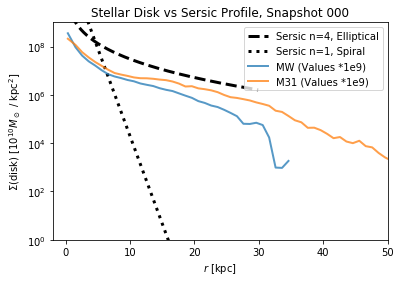

In [33]:
## plotting ##

#sersic profiles
plt.semilogy(r,SersicE(r, ReMW, 4, MW_StellarTotal), color = 'black', linestyle = '--',
                linewidth = 3, label = 'Sersic n=4, Elliptical')
plt.semilogy(r,SersicE(r, ReMW, 1, MW_StellarTotal), color = 'black', linestyle = ':',
                linewidth = 3, label = 'Sersic n=1, Spiral')
#density profiles
plt.semilogy(sdpMW.r_annuli, sdpMW.Sigma * 1e9, lw=2, alpha=0.75,label="MW (Values *1e9)")
plt.semilogy(sdpM31.r_annuli, sdpM31.Sigma * 1e9, lw=2, alpha=0.75,label="M31 (Values *1e9)")
#plt.semilogy((sdpM31.r_annuli+sdpMW.r_annuli), (sdpM31.Sigma + sdpMW.Sigma)*1e9, lw=2, alpha=0.75,label = "Total")

#plot specifications
plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"$\Sigma$(disk) [$10^{10} M_\odot$ / kpc$^2$]")
plt.title("Stellar Disk vs Sersic Profile, Snapshot 000")
plt.xlim(-2,50)
plt.ylim(1,1e9)
#plt.set(xlabel=r"$r$ [kpc]", ylabel=r"$\Sigma$(disk) [$10^{10} M_\odot$ / kpc$^2$]", title="Stellar Disk vs Sersic Profile", 
       #xlim=(-2, 70), ylim=(1e-6, 1))
legend = plt.legend(loc='upper right',fontsize='medium')

#plt.savefig("Sersic000.jpg")
plt.show()

## Part 3: Distribution of Stellar Particles in Merger

This third part of the code will be addressing the second question of my project, determining the distribution of stellar particles in the merger. I will be doing this again in a visual and an analytical way. The first part will be plotting the evolution of the particles in the merger- shown in .gif form. The second will be taking the last part of the merger and applying a contour to the outside. If the contours completely overlap each other, I will consider it mixed. If there are different shapes, I will consider it not to yet be a homgenous distribution.

### Part 3.1: Visual/Gif Format

In [ ]:
## for loop, make plots and make gifs from them to see how it evolves to point out best snaps ##

snap = np.arange(400,805,5)

for i in snap:
    ### Identifying which file/snapshot using ###
    #print(i)
    #add a string of the filenumber to the value "000"
    ilbl = '000' + str(i)
    
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    
    
    #define filename for MW Galaxy snapshots 
    MWfilename = "MW_VLowRes/MW_" + ilbl + '.txt' 
    #define filename for MW Galaxy snapshots 
    M31filename = "M31_VLowRes/M31_" + ilbl + '.txt'
    
    print(MWfilename)
    print(M31filename)
    
    ### X and Y position 
    #create center of mass object using disk particles
    COM_MW = CenterOfMass(MWfilename, 2)
    COM_M31 = CenterOfMass(M31filename,2)
    
    #COM position by Galaxy
    #MW
    COMP_MW = COM_MW.COM_P(0.1,2.0)
    #M31
    COMP_M31 = COM_M31.COM_P(0.1,2.0)
    #just the position based on the coordinates from CenterofMass outplut
    MWx = COM_MW.x-COMP_MW[0].value
    MWy = COM_MW.y-COMP_MW[1].value
    M31x = COM_M31.x-COMP_M31[0].value
    M31y = COM_M31.y-COMP_M31[1].value
    
    #plotting
    fig, ax = plt.subplots(figsize=(5, 4))
    #highlighted portions
    ax.scatter(MWx,MWy, color='blue',s=0.5,label = "MW Stellar Disk")
    ax.scatter(M31x,M31y, color='red',s=0.5,label= "M31 Stellar Disk")
    #ax.hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
    #ax.hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma' )
    #plt.colorbar()
    # Add axis labels
    #ax.set_xlabel('x (kpc)', fontsize=22)
    #ax.set_ylabel('y (kpc)', fontsize=22)
    #set axis limits
    #ax.set_ylim(-200,200)
    #ax.set_xlim(-200,200)
    
    #ax.set_title("Distribution of Stellar Particles at Snapshot " + str(i))
    ax.set(xlabel="x (kpc)", ylabel="y (kpc)", title="Stellar Disk Particles at snapshot " + str(i), 
        xlim=(-200,200), ylim=(-200,200))
    ax.legend(loc='best'); fig.tight_layout()
    #ax.legend(loc='best'); fig.tight_layout()
    
    fig.savefig("Particles_Snap" + str(i))

### Part 3.2: Final Snapshot Contour Plot

In [12]:
### Data for snapshot 800- redefine using previous center of mass code
### X and Y posiiton of the merger ###

#COM Data for MW Disk
COM_MW = CenterOfMass("MW_VLowRes/MW_800.txt",2)
#COM Data for M31 Disk
COM_M31 = CenterOfMass("M31_VLowRes/M31_800.txt",2)

#COM position by Galaxy
#MW
COMP_MW = COM_MW.COM_P(0.1,2.0)
#M31
COMP_M31 = COM_M31.COM_P(0.1,2.0)

#just the position based on the coordinates from CenterofMass output
MWx = COM_MW.x-COMP_MW[0].value
MWy = COM_MW.y-COMP_MW[1].value

M31x = COM_M31.x-COMP_M31[0].value
M31y = COM_M31.y-COMP_M31[1].value

In [52]:
# Code for plotting contours
#from https://gist.github.com/adrn/3993992

### This code was taken from Lab 8 ###

import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    
    # You might need to add a few levels
    one_sigma1 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.8))
    one_sigma2 = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.9))
    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.68','0.95', '0.99'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


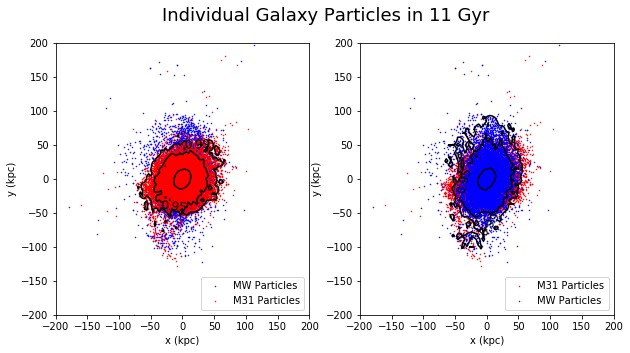

In [53]:
fig, ax = plt.subplots(figsize =(10 ,5),nrows=1, ncols=2)

fig.suptitle("Individual Galaxy Particles in 11 Gyr",fontsize = 18)


#Left side of plot- features M31 contours
ax[0].scatter(MWx,MWy, color='blue',s=0.25,label='MW Particles')
ax[0].scatter(M31x,M31y, color='red',s=0.25,label='M31 Particles')
ax[0].legend(loc='lower right',fontsize='medium')

ax[0].set_xlabel("x (kpc)")
ax[0].set_ylabel("y (kpc)")

ax[0].set_xlim(-200,200)
ax[0].set_ylim(-200,200)

#make the contour plot
density_contour(M31x, M31y, 80,80, ax=ax[0], colors=['black'])

#Right side of plot- features the MW contours
ax[1].scatter(M31x,M31y, color='red',s=0.25,label='M31 Particles')
ax[1].scatter(MWx,MWy, color='blue',s=0.25,label='MW Particles')
ax[1].legend(loc='lower right',fontsize='medium')

ax[1].set_xlabel("x (kpc)")
ax[1].set_ylabel("y (kpc)")

ax[1].set_xlim(-200,200)
ax[1].set_ylim(-200,200)

#make contour
density_contour(MWx, MWy, 80,80, ax=ax[1], colors=['black'])

#plt.savefig("MergerBoth.jpg")
fig.show()


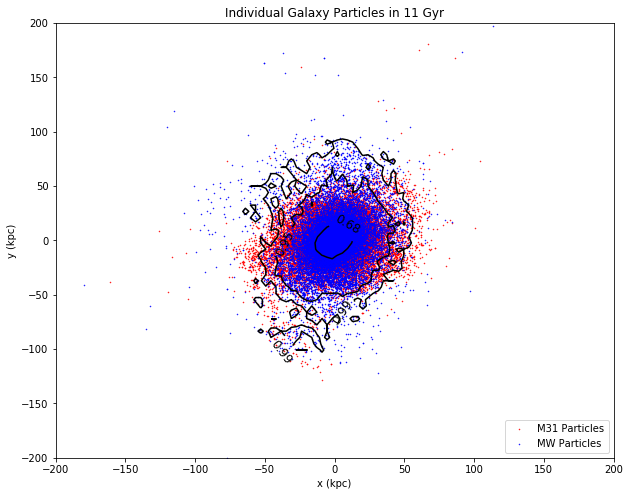

In [35]:
### Plotting ###

fig, ax = plt.subplots(figsize=(10, 8))

#ax.hist2d(MWx,MWy, bins=150, norm=LogNorm(),cmap='magma')
#ax.hist2d(M31x,M31y, bins=150, norm=LogNorm(),cmap='magma')

plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

plt.xlim(-200,200)
plt.ylim(-200,200)

plt.title("Individual Galaxy Particles in 11 Gyr")

#highlighted portions
plt.scatter(M31x,M31y, color='red',s=0.25,label='M31 Particles')
plt.scatter(MWx,MWy, color='blue',s=0.25,label='MW Particles')
legend = plt.legend(loc='lower right',fontsize='medium')

#make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
density_contour(MWx, MWy, 80,80, ax=ax, colors=['black'])
#density_contour(M31x, M31y, 80,80, ax=ax, colors=['black'])


#plt.savefig("Merger.jpg")
plt.show()
